### Hurst指数函数

In [16]:
# coding: utf-8
# 计算价格指数
from __future__ import division
from collections import Iterable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series

def calcHurst2(ts):

    if not isinstance(ts, Iterable):
        print('error')
        return

    n_min, n_max = 2, len(ts)//3
    RSlist = []
    for cut in range(n_min, n_max):
        children = len(ts)// cut
        children_list = [ts[i*children:(i+1)*children] for i in range(cut)]  
        L = []
        for a_children in children_list:
            Ma = np.mean(a_children)
            Xta = Series(map(lambda x: x-Ma, a_children)).cumsum()  
            Ra = max(Xta) - min(Xta)
            Sa = np.std(a_children)
            rs = Ra / Sa
            L.append(rs)
        RS = np.mean(L)
        RSlist.append(RS)
    H,c = np.polyfit(np.log(range(2+len(RSlist),2,-1)), np.log(RSlist), 1)  # 回归
    plt.scatter(np.log(range(2+len(RSlist),2,-1)), np.log(RSlist))  # 绘制散点图
    plt.plot(np.log(range(2+len(RSlist),2,-1)), c+H*np.log(range(2+len(RSlist),2,-1)))
    plt.ylabel('ln F(n)')
    plt.xlabel('lnn')
    return H,c

### 一、广州市二手房宗数
#### 1.1 整体数据可视化

Text(0.5, 1.0, '广州市二手房宗数：第二阶段')

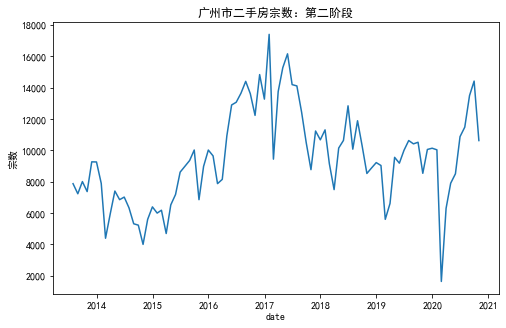

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(8,5))
plt.rcParams['font.sans-serif'] = ['SimHei']   # 中文字体
data = pd.read_excel(r'number.xls')
date = data.date
sec = data.sec
plt.plot(date,sec)
plt.ylabel('宗数')
plt.xlabel('date')
plt.title('广州市二手房宗数：第二阶段')

#### 1.2.1 第一阶段数据可视化

Text(0.5, 1.0, '广州市二手房宗数：第一阶段')

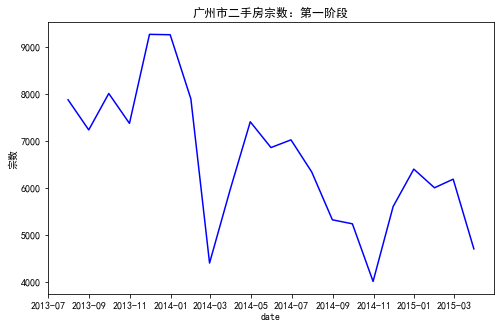

In [13]:
plt.figure(figsize=(8,5))
data = pd.read_excel(r'number.xls')[:21]
date = data.date
sec = data.sec
plt.plot(date,sec,'b')
plt.ylabel('宗数')
plt.xlabel('date')
plt.title('广州市二手房宗数：第一阶段')

#### 1.2.2 第一阶段Hurst

(1.225050651141912, -1.1531242577068141)

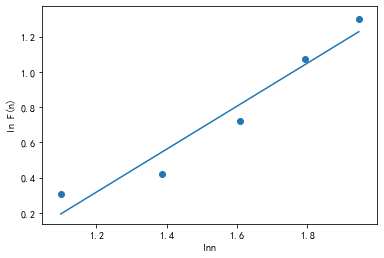

In [19]:
sec =  pd.read_excel(r'number.xls')[:21] # 数据导入
a = sec.iloc[:,1]
sec = np.log(sec.iloc[:,1])
H,c = calcHurst2(sec)
H,c

#### 1.3.1 第二阶段数据可视化

Text(0.5, 1.0, '广州市二手房宗数：第二阶段')

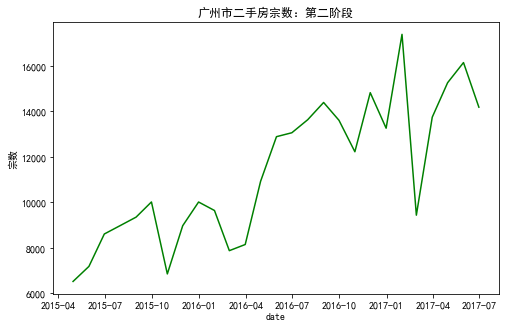

In [14]:
plt.figure(figsize=(8,5))
data = pd.read_excel(r'number.xls')[21:48]
date = data.date
sec = data.sec
plt.plot(date,sec,'g')
plt.ylabel('宗数')
plt.xlabel('date')
plt.title('广州市二手房宗数：第二阶段')

#### 1.3.2 第二阶段Hurst

(0.802624227300013, -0.6902551281477126)

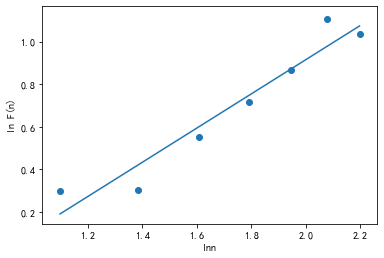

In [20]:
sec =  pd.read_excel(r'number.xls')[21:48] # 数据导入
a = sec.iloc[:,1]
sec = np.log(sec.iloc[:,1])
H,c = calcHurst2(sec)
H,c

#### 1.4.1 第三阶段数据可视化

Text(0.5, 1.0, '广州市二手房宗数：第三阶段')

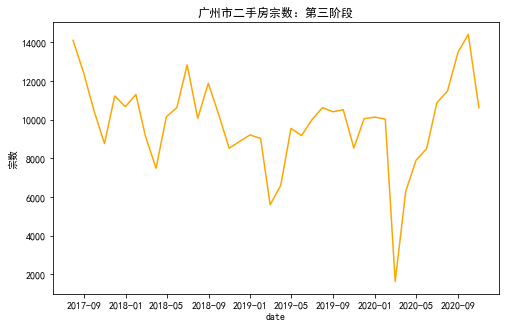

In [15]:
plt.figure(figsize=(8,5))
data = pd.read_excel(r'number.xls')[48:]
date = data.date
sec = data.sec
plt.plot(date,sec,'orange')
plt.ylabel('宗数')
plt.xlabel('date')
plt.title('广州市二手房宗数：第三阶段')

####  1.4.2 第三阶段Hurst

(0.8760171822049186, -0.9142127546296474)

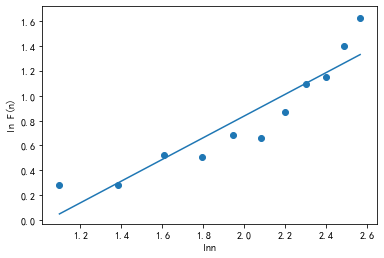

In [23]:
sec =  pd.read_excel(r'number.xls')[48:] # 数据导入
a = sec.iloc[:,1]
sec = np.log(sec.iloc[:,1])
H,c = calcHurst2(sec)
H,c

### 二、广州二手房价格指数

#### 2.1 数据可视化

Text(0.5, 1.0, '广州市二手房宗数：第二阶段')

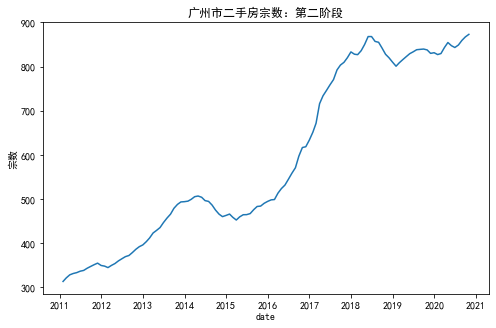

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.figure(figsize=(8,5))
plt.rcParams['font.sans-serif'] = ['SimHei']   # 中文字体
data = pd.read_excel(r'price.xls')# 数据导入
date = data.date
sec = data.sec
plt.plot(date,sec)
plt.ylabel('宗数')
plt.xlabel('date')
plt.title('广州市二手房宗数：第二阶段')

#### 2.2  Hurst指数

(0.912664259875317, -1.5657838502409664)

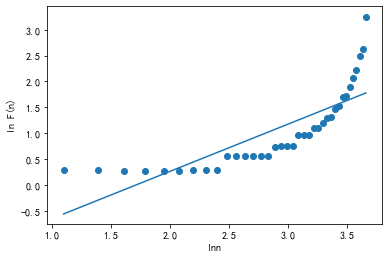

In [26]:
sec =  pd.read_excel(r'price.xls') # 数据导入
a = sec.iloc[:,1]
sec = np.log(sec.iloc[:,1])
H,c = calcHurst2(sec)
H,c

### 三、对数收益率计算

#### 3.1 宗数对数收益

Text(0.5, 1.0, '广州市二手房价宗数对数变化率')

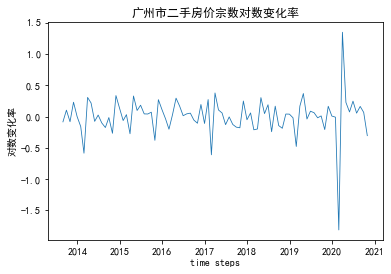

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   # 中文字体
sec =  pd.read_excel(r'number.xls') # 数据导入
data = pd.DataFrame(sec.sec)
d = np.log(data/data.shift(1))
date = sec.date
plt.plot(date[1:],d[1:],lw=0.8)
plt.xlabel('time steps')
plt.ylabel('对数变化率')
plt.title('广州市二手房价宗数对数变化率')

#### 3.2 价格指数对数收益

Text(0.5, 1.0, '广州市二手房价格指数对数收益率')

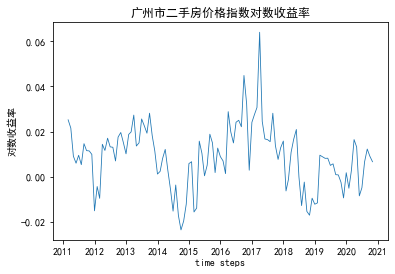

In [31]:
sec =  pd.read_excel(r'price.xls') # 数据导入
data = pd.DataFrame(sec.sec)
d = np.log(data/data.shift(1))
date = sec.date
plt.plot(date[1:],d[1:],lw=0.8)
plt.xlabel('time steps')
plt.ylabel('对数收益率')
plt.title('广州市二手房价格指数对数收益率')